In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

# GPU count comparison
---

In [2]:
gpus_experiments = [
    'multiple_reconstruction_1',
    'multiple_reconstruction_2',
    'multiple_reconstruction_4',
    'multiple_reconstruction_8',
]

experiments = ['experiment_1_t4_1', 'experiment_1_t4_2', 'experiment_1_t4_3', 
               'experiment_2_v100_1', 'experiment_2_v100_2', 'experiment_2_v100_3',
               'experiment_3_a100_1', 'experiment_3_a100_2', 'experiment_3_a100_3',]

labels = []
mins = []
maxs = []
means = []
means_incl_firsts = []
firsts = []
totals = []
down_ress = []
gpus_count = []
gpus = []

for gpus_experiment in gpus_experiments:
    for experiment in experiments:
        csv_filepath = os.path.join(gpus_experiment, experiment, 'training_epoch_data.csv')
        df = pd.read_csv(csv_filepath)
        mins.append(df.times[1:].min())
        maxs.append(df.times[1:].max())
        means.append(df.times[1:].mean())
        means_incl_firsts.append(df.times.mean())
        firsts.append(df.times[0])
        totals.append(len(df))
        
        config_filepath = os.path.join(gpus_experiment, experiment, 'config.json')
        config_data = json.load(open(config_filepath))
        down_ress.append(config_data['sensor_parameters']['down_res'])
        gpus_count.append(int(gpus_experiment.split('_')[-1]))
        gpus.append(experiment.split('_')[-2])
        
df = pd.DataFrame(data={
    'gpu': gpus,
    'gpu_count': gpus_count,
    'down_res': down_ress,
    'mins': mins,
    'maxs': maxs,
    'means': means,
    'firsts': firsts,
    'totals': totals,
})

In [135]:
df

,gpu,gpu_count,down_res,mins,maxs,means,firsts,totals
0,t4,1,8,14.385242,15.250772,14.635540,58.487975,333
1,t4,1,16,14.387755,15.208427,14.626514,16.188554,272
2,t4,1,32,14.375425,15.293786,14.648587,15.828905,362
3,v100,1,8,4.582397,4.662553,4.630896,26.279583,266
4,v100,1,16,4.570285,4.781240,4.621216,8.581237,330
5,v100,1,32,4.581775,4.795452,4.634558,8.904583,546
6,a100,1,8,3.293162,3.337108,3.310419,20.929866,170
7,a100,1,16,3.291224,3.311326,3.295127,6.459713,323
8,a100,1,32,3.292659,3.337742,3.309777,6.704672,301
9,t4,2,8,7.597877,8.653606,8.377063,41.339096,260


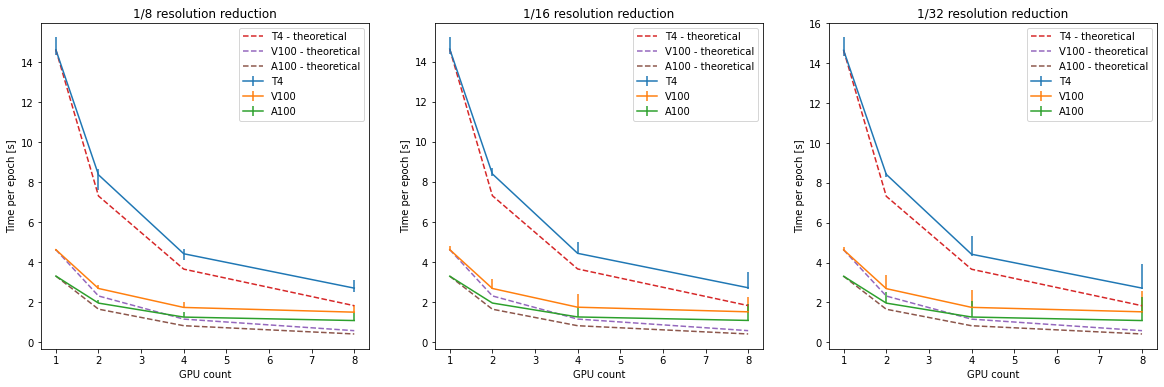

In [3]:
t4_8 = df.loc[(df.gpu=='t4') & (df.down_res==8)]
t4_16 = df.loc[(df.gpu=='t4') & (df.down_res==16)]
t4_32 = df.loc[(df.gpu=='t4') & (df.down_res==32)]
v100_8 = df.loc[(df.gpu=='v100') & (df.down_res==8)]
v100_16 = df.loc[(df.gpu=='v100') & (df.down_res==16)]
v100_32 = df.loc[(df.gpu=='v100') & (df.down_res==32)]
a100_8 = df.loc[(df.gpu=='a100') & (df.down_res==8)]
a100_16 = df.loc[(df.gpu=='a100') & (df.down_res==16)]
a100_32 = df.loc[(df.gpu=='a100') & (df.down_res==32)]

fig, axs = plt.subplots(1,3, figsize=(20,6))
axs[0].errorbar(t4_8.gpu_count, t4_8.means, yerr=[t4_8.means-t4_8.mins, t4_8.maxs-t4_8.means], label='T4')
axs[0].errorbar(v100_8.gpu_count, v100_8.means, yerr=[v100_8.means-v100_8.mins, v100_8.maxs-v100_8.means], label='V100')
axs[0].errorbar(a100_8.gpu_count, a100_8.means, yerr=[a100_8.means-a100_8.mins, a100_8.maxs-a100_8.means], label='A100')
axs[0].plot(t4_8.gpu_count, t4_8.means.reset_index(drop=True)[0]/t4_8.gpu_count, '--', label='T4 - theoretical')
axs[0].plot(v100_8.gpu_count, v100_8.means.reset_index(drop=True)[0]/v100_8.gpu_count, '--', label='V100 - theoretical')
axs[0].plot(a100_8.gpu_count, a100_8.means.reset_index(drop=True)[0]/a100_8.gpu_count, '--', label='A100 - theoretical')
axs[0].legend()
axs[0].set_ylabel('Time per epoch [s]')
axs[0].set_xlabel('GPU count')
axs[0].set_title('1/8 resolution reduction')

axs[1].errorbar(t4_16.gpu_count, t4_16.means, yerr=[t4_16.means-t4_16.mins, t4_16.maxs-t4_16.means], label='T4')
axs[1].errorbar(v100_16.gpu_count, v100_16.means, yerr=[v100_16.means-v100_16.mins, v100_16.maxs-v100_16.means], label='V100')
axs[1].errorbar(a100_16.gpu_count, a100_16.means, yerr=[a100_16.means-a100_16.mins, a100_16.maxs-a100_16.means], label='A100')
axs[1].plot(t4_16.gpu_count, t4_16.means.reset_index(drop=True)[0]/t4_16.gpu_count, '--', label='T4 - theoretical')
axs[1].plot(v100_16.gpu_count, v100_16.means.reset_index(drop=True)[0]/v100_16.gpu_count, '--', label='V100 - theoretical')
axs[1].plot(a100_16.gpu_count, a100_16.means.reset_index(drop=True)[0]/a100_16.gpu_count, '--', label='A100 - theoretical')
axs[1].legend()
axs[1].set_ylabel('Time per epoch [s]')
axs[1].set_xlabel('GPU count')
axs[1].set_title('1/16 resolution reduction')

axs[2].errorbar(t4_32.gpu_count, t4_32.means, yerr=[t4_32.means-t4_32.mins, t4_32.maxs-t4_32.means], label='T4')
axs[2].errorbar(v100_32.gpu_count, v100_32.means, yerr=[v100_32.means-v100_32.mins, v100_32.maxs-v100_32.means], label='V100')
axs[2].errorbar(a100_32.gpu_count, a100_32.means, yerr=[a100_32.means-a100_32.mins, a100_32.maxs-a100_32.means], label='A100')
axs[2].plot(t4_32.gpu_count, t4_32.means.reset_index(drop=True)[0]/t4_32.gpu_count, '--', label='T4 - theoretical')
axs[2].plot(v100_32.gpu_count, v100_32.means.reset_index(drop=True)[0]/v100_32.gpu_count, '--', label='V100 - theoretical')
axs[2].plot(a100_32.gpu_count, a100_32.means.reset_index(drop=True)[0]/a100_32.gpu_count, '--', label='A100 - theoretical')
axs[2].legend()
axs[2].set_ylabel('Time per epoch [s]')
axs[2].set_xlabel('GPU count')
axs[2].set_title('1/32 resolution reduction')


plt.show()

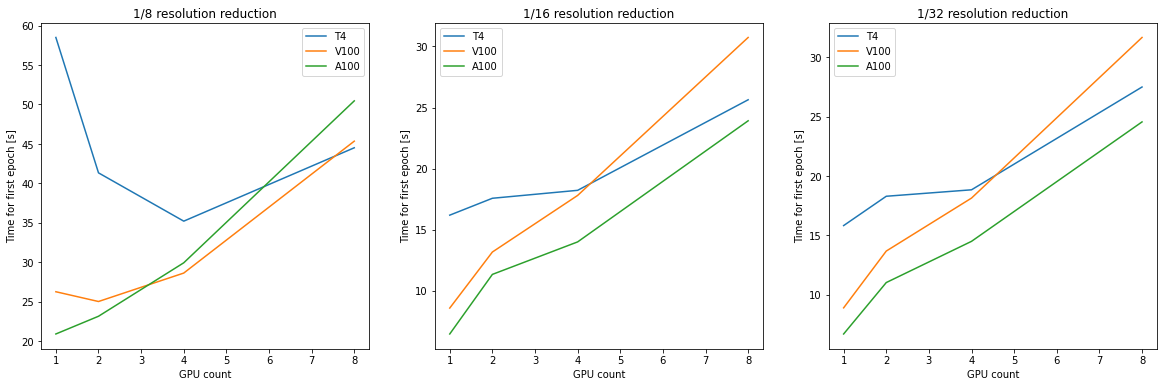

In [4]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
axs[0].plot(t4_8.gpu_count, t4_8.firsts, label='T4')
axs[0].plot(v100_8.gpu_count, v100_8.firsts, label='V100')
axs[0].plot(a100_8.gpu_count, a100_8.firsts, label='A100')
# axs[0].plot(t4_8.gpu_count, t4_8.firsts.reset_index(drop=True)[0]*t4_8.gpu_count, '--', label='T4 - theoretical')
# axs[0].plot(v100_8.gpu_count, v100_8.firsts.reset_index(drop=True)[0]*v100_8.gpu_count, '--', label='V100 - theoretical')
# axs[0].plot(a100_8.gpu_count, a100_8.firsts.reset_index(drop=True)[0]*a100_8.gpu_count, '--', label='A100 - theoretical')
axs[0].legend()
axs[0].set_ylabel('Time for first epoch [s]')
axs[0].set_xlabel('GPU count')
axs[0].set_title('1/8 resolution reduction')

axs[1].plot(t4_16.gpu_count, t4_16.firsts, label='T4')
axs[1].plot(v100_16.gpu_count, v100_16.firsts, label='V100')
axs[1].plot(a100_16.gpu_count, a100_16.firsts, label='A100')
# axs[1].plot(t4_16.gpu_count, t4_16.firsts.reset_index(drop=True)[0]*t4_16.gpu_count, '--', label='T4 - theoretical')
# axs[1].plot(v100_16.gpu_count, v100_16.firsts.reset_index(drop=True)[0]*v100_16.gpu_count, '--', label='V100 - theoretical')
# axs[1].plot(a100_16.gpu_count, a100_16.firsts.reset_index(drop=True)[0]*a100_16.gpu_count, '--', label='A100 - theoretical')
axs[1].legend()
axs[1].set_ylabel('Time for first epoch [s]')
axs[1].set_xlabel('GPU count')
axs[1].set_title('1/16 resolution reduction')

axs[2].plot(t4_32.gpu_count, t4_32.firsts, label='T4')
axs[2].plot(v100_32.gpu_count, v100_32.firsts, label='V100')
axs[2].plot(a100_32.gpu_count, a100_32.firsts, label='A100')
# axs[2].plot(t4_32.gpu_count, t4_32.firsts.reset_index(drop=True)[0]*t4_32.gpu_count, '--', label='T4 - theoretical')
# axs[2].plot(v100_32.gpu_count, v100_32.firsts.reset_index(drop=True)[0]*v100_32.gpu_count, '--', label='V100 - theoretical')
# axs[2].plot(a100_32.gpu_count, a100_32.firsts.reset_index(drop=True)[0]*a100_32.gpu_count, '--', label='A100 - theoretical')
axs[2].legend()
axs[2].set_ylabel('Time for first epoch [s]')
axs[2].set_xlabel('GPU count')
axs[2].set_title('1/32 resolution reduction')

plt.show()

In [5]:
gpus_experiments = [
    'multiple_reconstruction_1',
    'multiple_reconstruction_2',
    'multiple_reconstruction_4',
    'multiple_reconstruction_8',
]

experiments = ['experiment_1_t4_1', 'experiment_1_t4_2', 'experiment_1_t4_3', 
               'experiment_2_v100_1', 'experiment_2_v100_2', 'experiment_2_v100_3',
               'experiment_3_a100_1', 'experiment_3_a100_2', 'experiment_3_a100_3',]

prediction_samples = [
    'diamond_ar_1p25_total_prediction_time', 'diamond_ar_1p5_total_prediction_time', 'diamond_ar_1p66_total_prediction_time', 'diamond_ar_2p0_total_prediction_time',
    'triangle_ar_1p25_total_prediction_time', 'triangle_ar_1p5_total_prediction_time', 'triangle_ar_1p66_total_prediction_time', 'triangle_ar_2p0_total_prediction_time',
    'cylinder_half_total_prediction_time', 'cylinder_half_flipped_total_prediction_time'
]

times = []
sample = []
down_ress = []
gpus_count = []
gpus = []
firsts = []

for gpus_experiment in gpus_experiments:
    for experiment in experiments:
        filepath = os.path.join(gpus_experiment, experiment, 'output.json')
        with open(filepath) as json_file:
            json_data = json.load(json_file)
        counter = json_data['counter']
        data = json_data[str(counter)]
        
        config_filepath = os.path.join(gpus_experiment, experiment, 'config.json')
        config_data = json.load(open(config_filepath))
        
        
        tmp = []
        for idx, prediction_sample in enumerate(prediction_samples):
            if idx == 0:
                firsts.append(data[prediction_sample])
            else:
                tmp.append(data[prediction_sample])
     
        times.append(np.array(tmp).mean()/399*1000)
        sample.append(idx)
        down_ress.append(config_data['sensor_parameters']['down_res'])
        gpus_count.append(int(gpus_experiment.split('_')[-1]))
        gpus.append(experiment.split('_')[-2])

        
df = pd.DataFrame(data={
    'gpu': gpus,
    'gpu_count': gpus_count,
    'down_res': down_ress,
    'sample': sample,
    'times': times,
    'firsts': firsts,
})

In [6]:
df

,gpu,gpu_count,down_res,sample,times,firsts
0,t4,1,8,9,2.435530,2.217101
1,t4,1,16,9,2.333122,1.101064
2,t4,1,32,9,2.295233,1.010503
3,v100,1,8,9,0.956072,1.047403
4,v100,1,16,9,0.963126,0.581463
5,v100,1,32,9,0.975594,0.624794
6,a100,1,8,9,0.788609,0.887259
7,a100,1,16,9,0.791585,0.457699
8,a100,1,32,9,0.810185,0.461992
9,t4,2,8,9,1.967363,2.997275


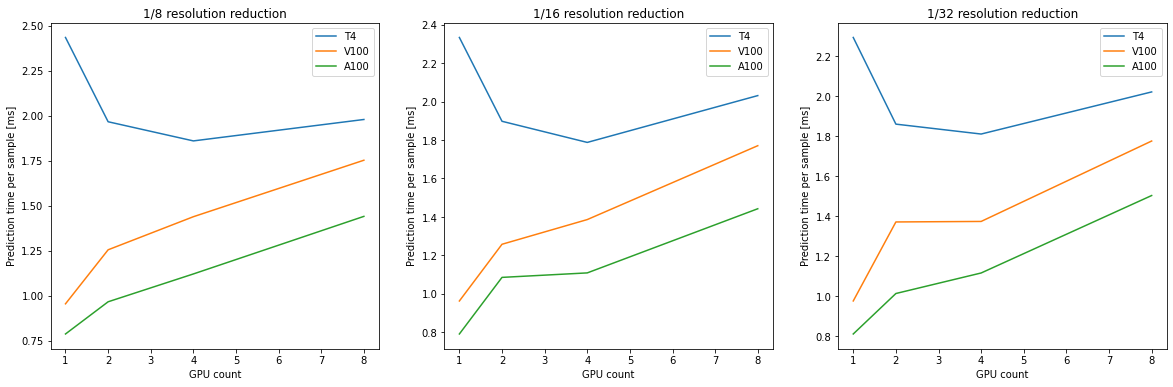

In [7]:
t4_8 = df.loc[(df.gpu=='t4') & (df.down_res==8)]
t4_16 = df.loc[(df.gpu=='t4') & (df.down_res==16)]
t4_32 = df.loc[(df.gpu=='t4') & (df.down_res==32)]
v100_8 = df.loc[(df.gpu=='v100') & (df.down_res==8)]
v100_16 = df.loc[(df.gpu=='v100') & (df.down_res==16)]
v100_32 = df.loc[(df.gpu=='v100') & (df.down_res==32)]
a100_8 = df.loc[(df.gpu=='a100') & (df.down_res==8)]
a100_16 = df.loc[(df.gpu=='a100') & (df.down_res==16)]
a100_32 = df.loc[(df.gpu=='a100') & (df.down_res==32)]

fig, axs = plt.subplots(1,3, figsize=(20,6))
axs[0].errorbar(t4_8.gpu_count, t4_8.times, label='T4')
axs[0].errorbar(v100_8.gpu_count, v100_8.times, label='V100')
axs[0].errorbar(a100_8.gpu_count, a100_8.times, label='A100')
# axs[0].plot(t4_8.gpu_count, t4_8.times.reset_index(drop=True)[0]/t4_8.gpu_count, '--', label='T4 - theoretical')
# axs[0].plot(v100_8.gpu_count, v100_8.times.reset_index(drop=True)[0]/v100_8.gpu_count, '--', label='V100 - theoretical')
# axs[0].plot(a100_8.gpu_count, a100_8.times.reset_index(drop=True)[0]/a100_8.gpu_count, '--', label='A100 - theoretical')
axs[0].legend()
axs[0].set_ylabel('Prediction time per sample [ms]')
axs[0].set_xlabel('GPU count')
axs[0].set_title('1/8 resolution reduction')

axs[1].errorbar(t4_16.gpu_count, t4_16.times, label='T4')
axs[1].errorbar(v100_16.gpu_count, v100_16.times, label='V100')
axs[1].errorbar(a100_16.gpu_count, a100_16.times, label='A100')
# axs[1].plot(t4_16.gpu_count, t4_16.times.reset_index(drop=True)[0]/t4_16.gpu_count, '--', label='T4 - theoretical')
# axs[1].plot(v100_16.gpu_count, v100_16.times.reset_index(drop=True)[0]/v100_16.gpu_count, '--', label='V100 - theoretical')
# axs[1].plot(a100_16.gpu_count, a100_16.times.reset_index(drop=True)[0]/a100_16.gpu_count, '--', label='A100 - theoretical')
axs[1].legend()
axs[1].set_ylabel('Prediction time per sample [ms]')
axs[1].set_xlabel('GPU count')
axs[1].set_title('1/16 resolution reduction')

axs[2].errorbar(t4_32.gpu_count, t4_32.times, label='T4')
axs[2].errorbar(v100_32.gpu_count, v100_32.times, label='V100')
axs[2].errorbar(a100_32.gpu_count, a100_32.times, label='A100')
# axs[2].plot(t4_32.gpu_count, t4_32.times.reset_index(drop=True)[0]/t4_32.gpu_count, '--', label='T4 - theoretical')
# axs[2].plot(v100_32.gpu_count, v100_32.times.reset_index(drop=True)[0]/v100_32.gpu_count, '--', label='V100 - theoretical')
# axs[2].plot(a100_32.gpu_count, a100_32.times.reset_index(drop=True)[0]/a100_32.gpu_count, '--', label='A100 - theoretical')
axs[2].legend()
axs[2].set_ylabel('Prediction time per sample [ms]')
axs[2].set_xlabel('GPU count')
axs[2].set_title('1/32 resolution reduction')


plt.show()

In [8]:
import tensorflow as tf
import time
from utils import *

obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]

save_folder_path = 'multiple_reconstruction_1/experiment_1_t4_1'
down_res = 8

times = []

with tf.device('cpu:0'):
    model_path = f'{save_folder_path}/model.h5'
    model = tf.keras.models.load_model(model_path)
    
    for obstacle in obstacles:
        dataset_filepath = f'primitives/{obstacle}/w_z.npy'
        y = load_data(dataset_filepath)
        y = np.transpose(y, (0, 2, 1))
        y = y[100:,:,:]
        y = reshape_for_cnn(y)
        y = y[:, 80:, :, :]
        y = resize_data(y)

        x = y[:, ::down_res, ::down_res, :].repeat(down_res, axis=1).repeat(down_res, axis=2)

        start_time = time.time()
        prediction = model.predict(x)
        end_time = time.time()
        
        times.append(end_time-start_time)

The shape of the data (t, m, n) is (500, 200, 500)
Resized data details:
    original data has shape (400, 420, 200, 1)
    resized data has shape (400, 256, 128, 1)

The shape of the data (t, m, n) is (500, 200, 500)
Resized data details:
    original data has shape (400, 420, 200, 1)
    resized data has shape (400, 256, 128, 1)

The shape of the data (t, m, n) is (500, 200, 500)
Resized data details:
    original data has shape (400, 420, 200, 1)
    resized data has shape (400, 256, 128, 1)

The shape of the data (t, m, n) is (500, 200, 500)
Resized data details:
    original data has shape (400, 420, 200, 1)
    resized data has shape (400, 256, 128, 1)

The shape of the data (t, m, n) is (500, 200, 500)
Resized data details:
    original data has shape (400, 420, 200, 1)
    resized data has shape (400, 256, 128, 1)

The shape of the data (t, m, n) is (500, 200, 500)
Resized data details:
    original data has shape (400, 420, 200, 1)
    resized data has shape (400, 256, 128, 1)

In [9]:
print(f'{np.array(times).mean()/400*1000:.2f}ms per sample')

33.69ms per sample


# CPU comparison
---

In [10]:
cpu_count = [16, 64, 96, 96]

core_16 = np.array([390, 388, 388, 388, 388])
core_32 = np.array([334, 331, 332, 331, 331])
core_48 = np.array([250, 247, 247, 248, 247])
core_96 = np.array([275, 273, 273, 273, 273])

mins = []
maxs = []
means = []
firsts = []

for core in [core_16, core_32, core_48, core_96]:
    mins.append(core[1:].min())
    maxs.append(core[1:].max())
    means.append(core[1:].mean())
    firsts.append(core[0])

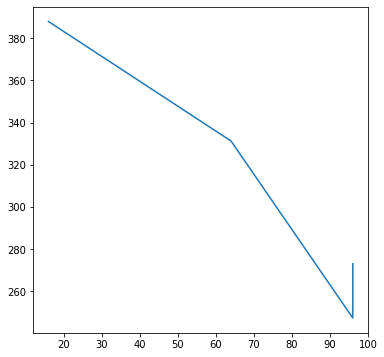

In [11]:
plt.figure(figsize=(6,6))
plt.plot(cpu_count, means)
plt.show()

# GPU comparison SCNN
---

In [12]:
frames = []

gpus_experiments = ['1_t4', '2_v100', '3_a100']
gpu_counts = [1,8]

mins = []
maxs = []
means = []
firsts = []
seconds = []
means_incl_firsts = []
totals = []
down_ress = []
gpus_count = []
gpus = []
batch_sizes = []

for gpu in gpus_experiments:
    for gpu_count in gpu_counts:
        csv_filepath = os.path.join(f'reconstruction_scnn_{gpu_count}', f'experiment_{gpu}', 'training_epoch_data.csv')
        data_df = pd.read_csv(csv_filepath)
        mins.append(data_df.times[2:].min())
        maxs.append(data_df.times[2:].max())
        means.append(data_df.times[2:].mean())
        means_incl_firsts.append(data_df.times.mean())
        firsts.append(data_df.times[0])
        seconds.append(data_df.times[1])
        totals.append(len(data_df))

        config_filepath = os.path.join(f'reconstruction_scnn_8', f'experiment_{gpu}', 'config.json')
        config_data = json.load(open(config_filepath))
        down_ress.append(config_data['sensor_parameters']['down_res'])
        batch_sizes.append(config_data['training_parameters']['batch_size'])
        gpus_count.append(gpu_count)
        gpus.append(gpu.split('_')[-1])
        
df = pd.DataFrame(data={
    'gpu': gpus,
    'gpu_count': gpus_count,
    'down_res': down_ress,
    'mins': mins,
    'maxs': maxs,
    'means': means,
    'firsts': firsts,
    'totals': totals,
    'batch_sizes': batch_sizes,
})

df

,gpu,gpu_count,down_res,mins,maxs,means,firsts,totals,batch_sizes
0,t4,1,8,0.217822,0.228250,0.221160,11.693181,405,100
1,t4,8,8,0.403225,0.632201,0.427591,24.479257,367,100
2,v100,1,8,0.145008,0.165287,0.150730,6.111887,329,100
3,v100,8,8,0.568778,0.879463,0.592258,27.487446,302,100
4,a100,1,8,0.113394,0.138252,0.126512,6.528088,429,100
5,a100,8,8,0.437262,1.723889,0.468379,39.481210,368,100


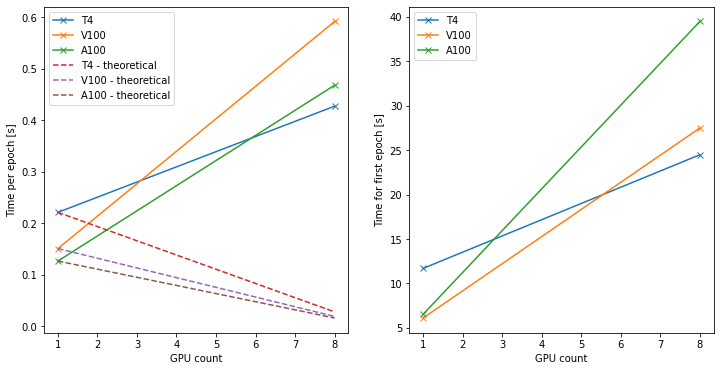

In [13]:
t4 = df.loc[(df.gpu=='t4')]
v100 = df.loc[(df.gpu=='v100')]
a100 = df.loc[(df.gpu=='a100')]

fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].plot(t4.gpu_count, t4.means, '-x', label='T4')
axs[0].plot(v100.gpu_count, v100.means, '-x', label='V100')
axs[0].plot(a100.gpu_count, a100.means, '-x', label='A100')
axs[0].plot(t4.gpu_count, t4.means.reset_index(drop=True)[0]/t4.gpu_count, '--', label='T4 - theoretical')
axs[0].plot(v100.gpu_count, v100.means.reset_index(drop=True)[0]/v100.gpu_count, '--', label='V100 - theoretical')
axs[0].plot(a100.gpu_count, a100.means.reset_index(drop=True)[0]/a100.gpu_count, '--', label='A100 - theoretical')
axs[0].legend()
axs[0].set_ylabel('Time per epoch [s]')
axs[0].set_xlabel('GPU count')

axs[1].plot(t4.gpu_count, t4.firsts, '-x', label='T4')
axs[1].plot(v100.gpu_count, v100.firsts, '-x', label='V100')
axs[1].plot(a100.gpu_count, a100.firsts, '-x', label='A100')
# axs[1].plot(t4.gpu_count, t4.firsts.reset_index(drop=True)[0]*t4.gpu_count, '--', label='T4 - theoretical')
# axs[1].plot(v100.gpu_count, v100.firsts.reset_index(drop=True)[0]/v100.gpu_count, '--', label='V100 - theoretical')
# axs[1].plot(a100.gpu_count, a100.firsts.reset_index(drop=True)[0]/a100.gpu_count, '--', label='A100 - theoretical')
axs[1].legend()
axs[1].set_ylabel('Time for first epoch [s]')
axs[1].set_xlabel('GPU count')
plt.show()

In [15]:
frames = []

gpus_experiments = ['t4', 'v100', 'a100']
experiments = [1,2,3,4,5,6,7]

mins = []
maxs = []
means = []
firsts = []
totals = []
down_ress = []
gpus_count = []
gpus = []

for gpu in gpus:
    for experiment in experiments:
        print('df')

# Batch size
---

In [16]:
frames = []

gpus_experiments = ['t4', 'v100', 'a100']
experiments = [1,2,3,4,5,6,7]

mins = []
maxs = []
means = []
firsts = []
seconds = []
means_incl_firsts = []
totals = []
down_ress = []
gpus_count = []
gpus = []
batch_sizes = []

for gpu in gpus_experiments:
    for experiment in experiments:
        csv_filepath = os.path.join(f'batch_size_{gpu}', f'experiment_{experiment}', 'training_epoch_data.csv')
        data_df = pd.read_csv(csv_filepath)
        mins.append(data_df.times[2:].min())
        maxs.append(data_df.times[2:].max())
        means.append(data_df.times[2:].mean())
        means_incl_firsts.append(data_df.times.mean())
        firsts.append(data_df.times[0])
        seconds.append(data_df.times[1])
        totals.append(len(data_df))
        
        config_filepath = os.path.join(f'batch_size_{gpu}', f'experiment_{experiment}', 'config.json')
        config_data = json.load(open(config_filepath))
        down_ress.append(config_data['sensor_parameters']['down_res'])
        batch_sizes.append(config_data['training_parameters']['batch_size'])
        gpus_count.append(8)
        gpus.append(gpu)
        
df = pd.DataFrame(data={
    'gpu': gpus,
    'gpu_count': gpus_count,
    'down_res': down_ress,
    'mins': mins,
    'maxs': maxs,
    'means': means,
    'firsts': firsts,
    'totals': totals,
    'batch_sizes': batch_sizes,
})

df

,gpu,gpu_count,down_res,mins,maxs,means,firsts,totals,batch_sizes
0,t4,8,8,0.497995,0.706659,0.521370,22.931173,272,32
1,t4,8,8,0.426935,1.029004,0.460957,11.908819,330,64
2,t4,8,8,0.374263,1.425925,0.406404,11.573363,589,128
3,t4,8,8,0.353603,1.687430,0.390217,12.674134,609,256
4,t4,8,8,0.349684,1.869974,0.383462,13.699777,590,512
5,t4,8,8,0.346695,2.208984,0.377094,13.977147,574,1024
6,t4,8,8,0.343836,0.591939,0.372430,22.856066,521,2048
7,v100,8,8,0.675240,0.951343,0.703808,26.176658,235,32
8,v100,8,8,0.574976,1.213212,0.605395,13.787627,303,64
9,v100,8,8,0.530917,1.511307,0.560975,14.899526,441,128


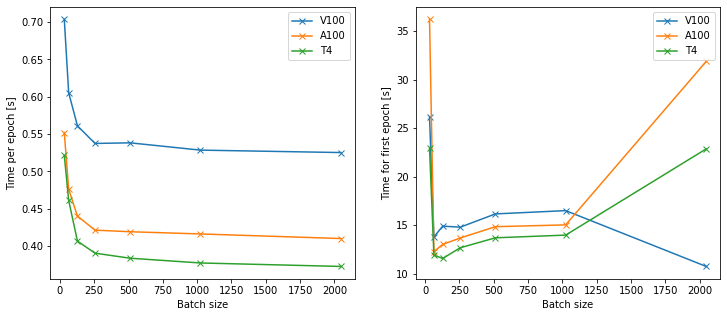

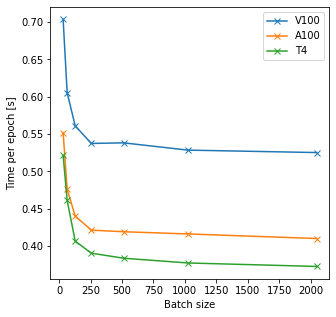

In [17]:
t4 = df.loc[(df.gpu=='t4')]
v100 = df.loc[(df.gpu=='v100')]
a100 = df.loc[(df.gpu=='a100')]

fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(v100.batch_sizes, v100.means, '-x', label='V100')
axs[0].plot(a100.batch_sizes, a100.means, '-x', label='A100')
axs[0].plot(t4.batch_sizes, t4.means, '-x', label='T4')
axs[0].legend()
axs[0].set_ylabel('Time per epoch [s]')
axs[0].set_xlabel('Batch size')
axs[0].set_title('')

axs[1].plot(v100.batch_sizes, v100.firsts, '-x', label='V100')
axs[1].plot(a100.batch_sizes, a100.firsts, '-x', label='A100')
axs[1].plot(t4.batch_sizes, t4.firsts, '-x', label='T4')
axs[1].legend()
axs[1].set_ylabel('Time for first epoch [s]')
axs[1].set_xlabel('Batch size')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(v100.batch_sizes, v100.means, '-x', label='V100')
plt.plot(a100.batch_sizes, a100.means, '-x', label='A100')
plt.plot(t4.batch_sizes, t4.means, '-x', label='T4')
plt.legend()
plt.ylabel('Time per epoch [s]')
plt.xlabel('Batch size')
plt.title('')
plt.show()

In [18]:
frames = []

gpus_experiments = ['t4', 'v100', 'a100']
experiments = [1,2,3,4,5,6,7]

mins = []
maxs = []
means = []
firsts = []
seconds = []
means_incl_firsts = []
totals = []
down_ress = []
gpus_count = []
gpus = []
batch_sizes = []

for gpu in gpus_experiments:
    for experiment in experiments:
        output_filepath = os.path.join(f'batch_size_{gpu}', f'experiment_{experiment}', 'output.json')
        config_filepath = os.path.join(f'batch_size_{gpu}', f'experiment_{experiment}', 'config.json')
        df = pd.read_json(output_filepath)
        df = df.drop(columns=['counter'])
        df = df.T
        config_data = json.load(open(config_filepath))
        df['gpu'] = gpu
        df['batch_size'] = config_data['training_parameters']['batch_size']
        frames.append(df)
    
df = pd.concat(frames)

df

,cylinder_half_flipped_max_l2_error,cylinder_half_flipped_mean_l2_error,cylinder_half_flipped_min_l2_error,cylinder_half_flipped_total_prediction_samples,cylinder_half_flipped_total_prediction_time,cylinder_half_max_l2_error,cylinder_half_mean_l2_error,cylinder_half_min_l2_error,cylinder_half_total_prediction_samples,cylinder_half_total_prediction_time,...,triangle_ar_1p66_min_l2_error,triangle_ar_1p66_total_prediction_samples,triangle_ar_1p66_total_prediction_time,triangle_ar_2p0_max_l2_error,triangle_ar_2p0_mean_l2_error,triangle_ar_2p0_min_l2_error,triangle_ar_2p0_total_prediction_samples,triangle_ar_2p0_total_prediction_time,gpu,batch_size
0,0.056332,0.049924,0.042121,400.0,0.389244,0.061658,0.046160,0.037236,400.0,0.394048,...,0.132540,400.0,0.383564,0.113580,0.113450,0.113337,400.0,0.389471,t4,32
0,0.058060,0.046272,0.033851,400.0,0.406922,0.056170,0.048093,0.036488,400.0,0.407593,...,0.130062,400.0,0.394350,0.105192,0.105049,0.104919,400.0,0.388910,t4,64
0,0.058795,0.046062,0.034618,400.0,0.385137,0.054646,0.045613,0.034903,400.0,0.399086,...,0.142736,400.0,0.409415,0.117360,0.117230,0.117130,400.0,0.394859,t4,128
0,0.060566,0.049824,0.043431,400.0,0.390139,0.063688,0.050467,0.038335,400.0,0.400516,...,0.145808,400.0,0.409998,0.102672,0.102610,0.102542,400.0,0.393183,t4,256
0,0.069156,0.055408,0.046925,400.0,0.403536,0.072273,0.061252,0.049958,400.0,0.405229,...,0.122968,400.0,0.409825,0.112373,0.112315,0.112259,400.0,0.399307,t4,512
0,0.073973,0.063049,0.056273,400.0,0.406588,0.075655,0.067328,0.054994,400.0,0.408070,...,0.142052,400.0,0.415954,0.113656,0.113561,0.113438,400.0,0.411242,t4,1024
0,0.099301,0.089050,0.082042,400.0,0.381012,0.131274,0.115448,0.098096,400.0,0.388062,...,0.156579,400.0,0.398836,0.146827,0.146805,0.146752,400.0,0.394741,t4,2048
0,0.066082,0.046418,0.033818,400.0,0.541209,0.055706,0.042668,0.033142,400.0,0.560496,...,0.134403,400.0,0.545532,0.122498,0.122417,0.122347,400.0,0.569826,v100,32
0,0.061771,0.048167,0.037456,400.0,0.545205,0.057338,0.047248,0.038593,400.0,0.554405,...,0.120843,400.0,0.551197,0.109111,0.109076,0.109043,400.0,0.560079,v100,64
0,0.060030,0.048830,0.041784,400.0,0.558459,0.056486,0.048505,0.036461,400.0,0.537403,...,0.131835,400.0,0.558040,0.113867,0.113734,0.113609,400.0,0.560917,v100,128


In [19]:
df_val = df[['min_l2_error','max_l2_error','mean_l2_error', 'total_prediction_time', 'total_prediction_samples', 'total_training_time', 'total_epochs', 'batch_size', 'gpu']].set_index(['gpu'])
df_val[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val['prediction_time_per_sample'] = df_val['total_prediction_time'] / df_val['total_prediction_samples'] * 1000
df_val['time_per_epoch'] = df_val['total_training_time'] / df_val['total_epochs']
df_val = df_val.fillna('-')

df_val = df_val.rename(columns={
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'total_prediction_time':'Total prediction time [s]',
    'total_prediction_samples':'Total prediction samples',
    'prediction_time_per_sample':'Prediction time per sample [ms]',
    'total_training_time':'Total training time [s]',
    'total_epochs':'Total epochs',
    'time_per_epoch': 'Time per epoch [s]'
})
df_val

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Total training time [s],Total epochs,batch_size,Prediction time per sample [ms],Time per epoch [s]
gpu,,,,,,,,,,
t4,2.299464,3.067350,2.631565,1.596044,320.0,166.094656,272.0,32,4.987636,0.610642
t4,1.552556,2.435920,1.964072,1.578258,320.0,165.730793,330.0,64,4.932057,0.502215
t4,1.570382,2.458483,2.060693,1.626163,320.0,253.974032,589.0,128,5.081761,0.431195
t4,2.085612,3.442391,2.872958,1.568923,320.0,253.567943,609.0,256,4.902886,0.416368
t4,2.860042,4.802809,3.863398,1.601884,320.0,243.147101,590.0,512,5.005889,0.412114
t4,3.643414,6.554821,4.957519,1.575723,320.0,233.528754,574.0,1024,4.924136,0.406845
t4,7.061961,16.182825,10.270695,1.770310,320.0,223.923270,521.0,2048,5.532218,0.429795
v100,1.580544,2.313951,1.875085,1.886844,320.0,193.209136,235.0,32,5.896388,0.822167
v100,1.601697,2.412980,2.026011,1.816337,320.0,199.452239,303.0,64,5.676054,0.658258


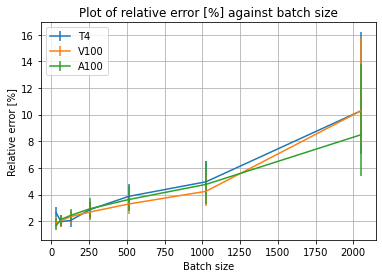

In [20]:
t4 = df.loc[(df.gpu=='t4')]
v100 = df.loc[(df.gpu=='v100')]
a100 = df.loc[(df.gpu=='a100')]

plt.figure()

plt.errorbar(t4.batch_size, t4.mean_l2_error*100, yerr=[(t4.mean_l2_error-t4.min_l2_error)*100, (t4.max_l2_error-t4.mean_l2_error)*100], label='T4')
plt.errorbar(v100.batch_size, v100.mean_l2_error*100, yerr=[(v100.mean_l2_error-v100.min_l2_error)*100, (v100.max_l2_error-v100.mean_l2_error)*100], label='V100')
plt.errorbar(a100.batch_size, a100.mean_l2_error*100, yerr=[(a100.mean_l2_error-a100.min_l2_error)*100, (a100.max_l2_error-a100.mean_l2_error)*100], label='A100')

plt.ylabel('Relative error [%]')
plt.xlabel('Batch size')
plt.grid()
plt.legend(loc='upper left')
plt.title('Plot of relative error [%] against batch size')
plt.show()

# DSC/MS reconstruction
---

In [21]:
frames = []

gpus_experiments = ['1_t4', '2_v100', '3_a100']
gpu_counts = [1,8]

mins = []
maxs = []
means = []
firsts = []
seconds = []
means_incl_firsts = []
totals = []
down_ress = []
gpus_count = []
gpus = []
batch_sizes = []

for gpu in gpus_experiments:
    for gpu_count in gpu_counts:
        csv_filepath = os.path.join(f'reconstruction_{gpu_count}', f'experiment_{gpu}', 'training_epoch_data.csv')
        data_df = pd.read_csv(csv_filepath)
        mins.append(data_df.times[2:].min())
        maxs.append(data_df.times[2:].max())
        means.append(data_df.times[2:].mean())
        means_incl_firsts.append(data_df.times.mean())
        firsts.append(data_df.times[0])
        seconds.append(data_df.times[1])
        totals.append(len(data_df))

        config_filepath = os.path.join(f'reconstruction_8', f'experiment_{gpu}', 'config.json')
        config_data = json.load(open(config_filepath))
        down_ress.append(config_data['sensor_parameters']['down_res'])
        batch_sizes.append(config_data['training_parameters']['batch_size'])
        gpus_count.append(gpu_count)
        gpus.append(gpu.split('_')[-1])
        
df = pd.DataFrame(data={
    'gpu': gpus,
    'gpu_count': gpus_count,
    'down_res': down_ress,
    'mins': mins,
    'maxs': maxs,
    'means': means,
    'firsts': firsts,
    'totals': totals,
    'batch_sizes': batch_sizes,
})

df

,gpu,gpu_count,down_res,mins,maxs,means,firsts,totals,batch_sizes
0,t4,1,8,14.284794,15.191150,14.593438,58.365209,297,100
1,t4,8,8,2.582847,3.102878,2.710666,44.690445,250,100
2,v100,1,8,4.563563,4.668137,4.624636,147.536794,345,100
3,v100,8,8,1.465694,1.854990,1.505984,51.072887,300,100
4,a100,1,8,3.304196,3.334429,3.327793,152.149321,205,100
5,a100,8,8,1.054026,2.041725,1.092957,57.667608,188,100


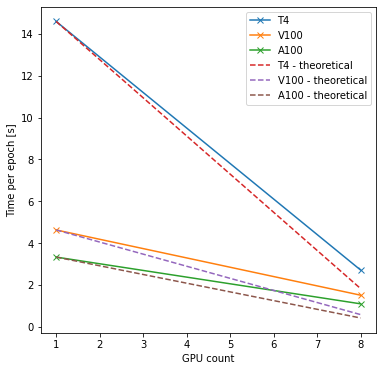

In [22]:
t4 = df.loc[(df.gpu=='t4')]
v100 = df.loc[(df.gpu=='v100')]
a100 = df.loc[(df.gpu=='a100')]

plt.figure(figsize=(6,6))
plt.plot(t4.gpu_count, t4.means, '-x', label='T4')
plt.plot(v100.gpu_count, v100.means, '-x', label='V100')
plt.plot(a100.gpu_count, a100.means, '-x', label='A100')

plt.plot(t4.gpu_count, t4.means.reset_index(drop=True)[0]/t4.gpu_count, '--', label='T4 - theoretical')
plt.plot(v100.gpu_count, v100.means.reset_index(drop=True)[0]/v100.gpu_count, '--', label='V100 - theoretical')
plt.plot(a100.gpu_count, a100.means.reset_index(drop=True)[0]/a100.gpu_count, '--', label='A100 - theoretical')
plt.legend()
plt.ylabel('Time per epoch [s]')
plt.xlabel('GPU count')
plt.show()

# Cost comparison
---

In [23]:
instances = [
    'p4d.24xlarge',
    'p3.2xlarge', 'p3.8xlarge', 'p3.16xlarge',
    'g4dn.xlarge', 'g4dn.2xlarge', 'g4dn.4xlarge', 'g4dn.8xlarge', 'g4dn.16xlarge',
    'g4dn.12xlarge', 'g4dn.metal', 
]
gpus = ['a100' if 'p4' in instance else 'v100' if 'p3' in instance else 't4' for instance in instances]
gpu_counts = [8, 1, 4, 8, 1, 1, 1, 1, 1, 4, 8]
costs = [32.77, 3.06, 12.24, 31.218, 0.526, 0.752, 1.204, 2.176, 4.352, 3.912, 7.824]

df_instances = pd.DataFrame(data={
    'instances': instances,
    'gpu': gpus,
    'gpu_count': gpu_counts,
    'costs': costs,
})

df_instances

,instances,gpu,gpu_count,costs
0,p4d.24xlarge,a100,8,32.770
1,p3.2xlarge,v100,1,3.060
2,p3.8xlarge,v100,4,12.240
3,p3.16xlarge,v100,8,31.218
4,g4dn.xlarge,t4,1,0.526
5,g4dn.2xlarge,t4,1,0.752
6,g4dn.4xlarge,t4,1,1.204
7,g4dn.8xlarge,t4,1,2.176
8,g4dn.16xlarge,t4,1,4.352
9,g4dn.12xlarge,t4,4,3.912


In [24]:
# DSC/MS
gpus_experiments = [
    'multiple_reconstruction_1',
    'multiple_reconstruction_2',
    'multiple_reconstruction_4',
    'multiple_reconstruction_8',
]

experiments = ['experiment_1_t4_1', 'experiment_2_v100_1','experiment_3_a100_1']

labels = []
mins = []
maxs = []
means = []
means_incl_firsts = []
firsts = []
totals = []
down_ress = []
gpus_count = []
gpus = []

for gpus_experiment in gpus_experiments:
    for experiment in experiments:
        csv_filepath = os.path.join(gpus_experiment, experiment, 'training_epoch_data.csv')
        df = pd.read_csv(csv_filepath)
        mins.append(df.times[1:].min())
        maxs.append(df.times[1:].max())
        means.append(df.times[1:].mean())
        means_incl_firsts.append(df.times.mean())
        firsts.append(df.times[0])
        totals.append(len(df))
        
        config_filepath = os.path.join(gpus_experiment, experiment, 'config.json')
        config_data = json.load(open(config_filepath))
        down_ress.append(config_data['sensor_parameters']['down_res'])
        gpus_count.append(int(gpus_experiment.split('_')[-1]))
        gpus.append(experiment.split('_')[-2])
        
df = pd.DataFrame(data={
    'gpu': gpus,
    'gpu_count': gpus_count,
    'down_res': down_ress,
    'mins': mins,
    'maxs': maxs,
    'means': means,
    'firsts': firsts,
    'totals': totals,
})

df

,gpu,gpu_count,down_res,mins,maxs,means,firsts,totals
0,t4,1,8,14.385242,15.250772,14.635540,58.487975,333
1,v100,1,8,4.582397,4.662553,4.630896,26.279583,266
2,a100,1,8,3.293162,3.337108,3.310419,20.929866,170
3,t4,2,8,7.597877,8.653606,8.377063,41.339096,260
4,v100,2,8,2.665980,2.847036,2.690764,25.041831,230
5,a100,2,8,1.945511,2.098951,1.958531,23.173987,296
6,t4,4,8,4.095390,4.681145,4.427987,35.220606,152
7,v100,4,8,1.724408,1.994854,1.741677,28.645412,292
8,a100,4,8,1.247372,1.527701,1.258886,29.946766,169
9,t4,8,8,2.530338,3.123940,2.708101,44.514972,361


In [25]:
df_calc = df_instances.set_index(['gpu', 'gpu_count']).join(df.set_index(['gpu', 'gpu_count']), how='left')
df_calc['total_time'] = df_calc['means'] * 1000 / 60
df_calc['total_cost'] = df_calc['costs'] * df_calc['total_time'] / 60
df_calc

instances   costs  down_res       mins       maxs  \
gpu  gpu_count                                                          
a100 8           p4d.24xlarge  32.770         8   1.053914   1.449324   
t4   1            g4dn.xlarge   0.526         8  14.385242  15.250772   
     1           g4dn.2xlarge   0.752         8  14.385242  15.250772   
     1           g4dn.4xlarge   1.204         8  14.385242  15.250772   
     1           g4dn.8xlarge   2.176         8  14.385242  15.250772   
     1          g4dn.16xlarge   4.352         8  14.385242  15.250772   
     4          g4dn.12xlarge   3.912         8   4.095390   4.681145   
     8             g4dn.metal   7.824         8   2.530338   3.123940   
v100 1             p3.2xlarge   3.060         8   4.582397   4.662553   
     4             p3.8xlarge  12.240         8   1.724408   1.994854   
     8            p3.16xlarge  31.218         8   1.461502   1.868944   

                    means     firsts  totals  total_time  total_cost  
gpu  gpu_count                                                        
a100 8           1.085646  50.456720     165   18.094106    9.882398  
t4   1          14.635540  58.487975     333  243.925661    2.138415  
     1          14.635540  58.487975     333  243.925661    3.057202  
     1          14.635540  58.487975     333  243.925661    4.894775  
     1          14.635540  58.487975     333  243.925661    8.846371  
     1          14.635540  58.487975     333  243.925661   17.692741  
     4           4.427987  35.220606     152   73.799783    4.811746  
     8           2.708101  44.514972     361   45.135014    5.885606  
v100 1           4.630896  26.279583     266   77.181602    3.936262  
     4           1.741677  28.645412     292   29.027950    5.921702  
     8           1.504816  45.352781     295   25.080270   13.049264

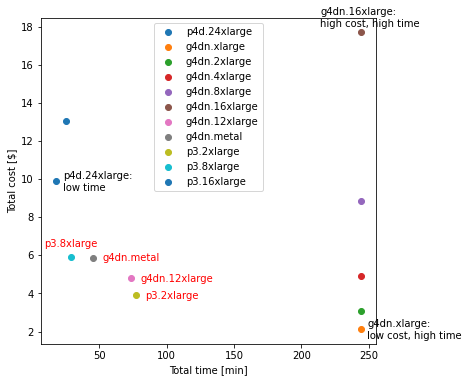

In [26]:
plt.figure(figsize=(6,6))
# plt.scatter(df_calc.total_time, df_calc.total_cost)
# for i, txt in enumerate(df_calc.instances):
#     plt.annotate(txt, (df_calc.total_time[i]+1, df_calc.total_cost[i]+0.3))
for i in range(len(df_calc)):
    plt.scatter(df_calc.total_time[i], df_calc.total_cost[i], label=df_calc.instances[i])
    
plt.annotate(f'{df_calc.instances[5]}:\nhigh cost, high time', (df_calc.total_time[5]-30, df_calc.total_cost[5]+0.3))
plt.annotate(f'{df_calc.instances[1]}:\nlow cost, high time', (df_calc.total_time[1]+5, df_calc.total_cost[1]-0.5))
plt.annotate(f'{df_calc.instances[0]}:\nlow time', (df_calc.total_time[0]+5, df_calc.total_cost[0]-0.5))

plt.annotate(f'{df_calc.instances[9]}', (df_calc.total_time[9]-20, df_calc.total_cost[9]+0.5), color='r')
plt.annotate(f'{df_calc.instances[7]}', (df_calc.total_time[7]+7, df_calc.total_cost[7]-0.2), color='r')
plt.annotate(f'{df_calc.instances[6]}', (df_calc.total_time[6]+7, df_calc.total_cost[6]-0.2), color='r')
plt.annotate(f'{df_calc.instances[8]}', (df_calc.total_time[8]+7, df_calc.total_cost[8]-0.2), color='r')


plt.xlabel('Total time [min]')
plt.ylabel('Total cost [$]')
plt.legend(loc='upper center')
plt.show()

In [27]:
# SCNN
frames = []

gpus_experiments = ['1_t4', '2_v100', '3_a100']
gpu_counts = [1,8]

mins = []
maxs = []
means = []
firsts = []
seconds = []
means_incl_firsts = []
totals = []
down_ress = []
gpus_count = []
gpus = []
batch_sizes = []

for gpu in gpus_experiments:
    for gpu_count in gpu_counts:
        csv_filepath = os.path.join(f'reconstruction_scnn_{gpu_count}', f'experiment_{gpu}', 'training_epoch_data.csv')
        data_df = pd.read_csv(csv_filepath)
        mins.append(data_df.times[2:].min())
        maxs.append(data_df.times[2:].max())
        means.append(data_df.times[2:].mean())
        means_incl_firsts.append(data_df.times.mean())
        firsts.append(data_df.times[0])
        seconds.append(data_df.times[1])
        totals.append(len(data_df))

        config_filepath = os.path.join(f'reconstruction_scnn_8', f'experiment_{gpu}', 'config.json')
        config_data = json.load(open(config_filepath))
        down_ress.append(config_data['sensor_parameters']['down_res'])
        batch_sizes.append(config_data['training_parameters']['batch_size'])
        gpus_count.append(gpu_count)
        gpus.append(gpu.split('_')[-1])
        
df = pd.DataFrame(data={
    'gpu': gpus,
    'gpu_count': gpus_count,
    'down_res': down_ress,
    'mins': mins,
    'maxs': maxs,
    'means': means,
    'firsts': firsts,
    'totals': totals,
    'batch_sizes': batch_sizes,
})

df

,gpu,gpu_count,down_res,mins,maxs,means,firsts,totals,batch_sizes
0,t4,1,8,0.217822,0.228250,0.221160,11.693181,405,100
1,t4,8,8,0.403225,0.632201,0.427591,24.479257,367,100
2,v100,1,8,0.145008,0.165287,0.150730,6.111887,329,100
3,v100,8,8,0.568778,0.879463,0.592258,27.487446,302,100
4,a100,1,8,0.113394,0.138252,0.126512,6.528088,429,100
5,a100,8,8,0.437262,1.723889,0.468379,39.481210,368,100


In [28]:
df_calc = df_instances.set_index(['gpu', 'gpu_count']).join(df.set_index(['gpu', 'gpu_count']), how='left')
df_calc['total_time'] = df_calc['means'] * 1000 / 60
df_calc['total_cost'] = df_calc['costs'] * df_calc['total_time'] / 60
df_calc

instances   costs  down_res      mins      maxs     means  \
gpu  gpu_count                                                                  
a100 8           p4d.24xlarge  32.770       8.0  0.437262  1.723889  0.468379   
t4   1            g4dn.xlarge   0.526       8.0  0.217822  0.228250  0.221160   
     1           g4dn.2xlarge   0.752       8.0  0.217822  0.228250  0.221160   
     1           g4dn.4xlarge   1.204       8.0  0.217822  0.228250  0.221160   
     1           g4dn.8xlarge   2.176       8.0  0.217822  0.228250  0.221160   
     1          g4dn.16xlarge   4.352       8.0  0.217822  0.228250  0.221160   
     4          g4dn.12xlarge   3.912       NaN       NaN       NaN       NaN   
     8             g4dn.metal   7.824       8.0  0.403225  0.632201  0.427591   
v100 1             p3.2xlarge   3.060       8.0  0.145008  0.165287  0.150730   
     4             p3.8xlarge  12.240       NaN       NaN       NaN       NaN   
     8            p3.16xlarge  31.218       8.0  0.568778  0.879463  0.592258   

                   firsts  totals  batch_sizes  total_time  total_cost  
gpu  gpu_count                                                          
a100 8          39.481210   368.0        100.0    7.806324    4.263554  
t4   1          11.693181   405.0        100.0    3.686004    0.032314  
     1          11.693181   405.0        100.0    3.686004    0.046198  
     1          11.693181   405.0        100.0    3.686004    0.073966  
     1          11.693181   405.0        100.0    3.686004    0.133679  
     1          11.693181   405.0        100.0    3.686004    0.267358  
     4                NaN     NaN          NaN         NaN         NaN  
     8          24.479257   367.0        100.0    7.126510    0.929297  
v100 1           6.111887   329.0        100.0    2.512161    0.128120  
     4                NaN     NaN          NaN         NaN         NaN  
     8          27.487446   302.0        100.0    9.870970    5.135866

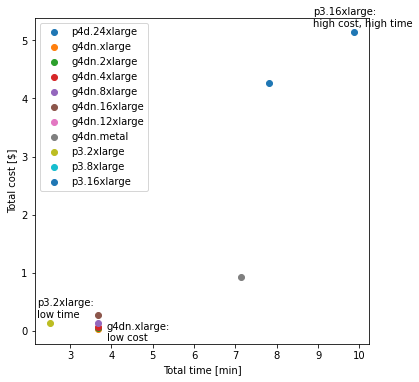

In [29]:
plt.figure(figsize=(6,6))
# plt.scatter(df_calc.total_time, df_calc.total_cost)
# for i, txt in enumerate(df_calc.instances):
#     plt.annotate(txt, (df_calc.total_time[i]+1, df_calc.total_cost[i]+0.3))
for i in range(len(df_calc)):
    plt.scatter(df_calc.total_time[i], df_calc.total_cost[i], label=df_calc.instances[i])

plt.annotate(f'{df_calc.instances[10]}:\nhigh cost, high time', (df_calc.total_time[10]-1, df_calc.total_cost[10]+0.1))
plt.annotate(f'{df_calc.instances[8]}:\nlow time', (df_calc.total_time[8]-0.3, df_calc.total_cost[8]+0.1))
plt.annotate(f'{df_calc.instances[1]}:\nlow cost', (df_calc.total_time[1]+0.2, df_calc.total_cost[1]-0.21))
# plt.annotate(df_calc.instances[10], (df_calc.total_time[10], df_calc.total_cost[10]))

plt.xlabel('Total time [min]')
plt.ylabel('Total cost [$]')
plt.legend()
plt.show()

In [30]:
i

10

# Large dataset
---

In [31]:
frames = []
interpolation_dirs = [1,2,3,4,5,6]

output_filepath = os.path.join(f'../spatio_reconstruction_cnn/model_comparison/experiment_8', 'output.json')
config_filepath = os.path.join(f'../spatio_reconstruction_cnn/model_comparison/experiment_8', 'config.json')
df = pd.read_json(output_filepath)
df = df.drop(columns=['counter'])
df = df.T
config_data = json.load(open(config_filepath))
df['down_res'] = config_data['sensor_parameters']['down_res']
df['dataset'] = config_data['dataset_parameters']['dataset_filepath'].split('/')[1]
frames.append(df)

output_filepath = os.path.join(f'../spatio_reconstruction_cnn/model_comparison/experiment_18', 'output.json')
config_filepath = os.path.join(f'../spatio_reconstruction_cnn/model_comparison/experiment_18', 'config.json')
df = pd.read_json(output_filepath)
df = df.drop(columns=['counter'])
df = df.T
config_data = json.load(open(config_filepath))
df['down_res'] = config_data['sensor_parameters']['down_res']
df['dataset'] = config_data['dataset_parameters']['dataset_filepath'].split('/')[1]
frames.append(df)

output_filepath = os.path.join(f'large_dataset_reconstruction_8/experiment_3_a100', 'output.json')
config_filepath = os.path.join(f'large_dataset_reconstruction_8/experiment_3_a100', 'config.json')
df = pd.read_json(output_filepath)
df = df.drop(columns=['counter'])
df = df.T
config_data = json.load(open(config_filepath))
df['down_res'] = config_data['sensor_parameters']['down_res']
df['dataset'] = config_data['dataset_parameters']['dataset_filepath'].split('/')[1]
frames.append(df)


output_filepath = os.path.join(f'../spatio_reconstruction_cnn/model_comparison/experiment_16', 'output.json')
config_filepath = os.path.join(f'../spatio_reconstruction_cnn/model_comparison/experiment_16', 'config.json')
df = pd.read_json(output_filepath)
df = df.drop(columns=['counter'])
df = df.T
config_data = json.load(open(config_filepath))
df['down_res'] = config_data['sensor_parameters']['down_res']
df['dataset'] = config_data['dataset_parameters']['dataset_filepath'].split('/')[1]
frames.append(df)

output_filepath = os.path.join(f'../spatio_reconstruction_cnn/model_comparison/experiment_17', 'output.json')
config_filepath = os.path.join(f'../spatio_reconstruction_cnn/model_comparison/experiment_17', 'config.json')
df = pd.read_json(output_filepath)
df = df.drop(columns=['counter'])
df = df.T
config_data = json.load(open(config_filepath))
df['down_res'] = config_data['sensor_parameters']['down_res']
df['dataset'] = config_data['dataset_parameters']['dataset_filepath'].split('/')[1]
frames.append(df)

output_filepath = os.path.join(f'large_dataset_reconstruction_8_32/experiment_3_a100', 'output.json')
config_filepath = os.path.join(f'large_dataset_reconstruction_8_32/experiment_3_a100', 'config.json')
df = pd.read_json(output_filepath)
df = df.drop(columns=['counter'])
df = df.T
config_data = json.load(open(config_filepath))
df['down_res'] = config_data['sensor_parameters']['down_res']
df['dataset'] = config_data['dataset_parameters']['dataset_filepath'].split('/')[1]
frames.append(df)
    
df = pd.concat(frames)
# cases = ['No scaling', 'Mean centring']
# df['case'] = cases
df = df.groupby(['down_res', 'dataset']).last().reset_index()
df

ValueError: Expected object or value

In [32]:
df_val = df[['min_l2_error','max_l2_error','mean_l2_error', 'total_prediction_time', 'total_prediction_samples', 'total_training_time', 'total_epochs', 'down_res', 'dataset']].set_index(['down_res', 'dataset'])
df_val[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val['prediction_time_per_sample'] = df_val['total_prediction_time'] / df_val['total_prediction_samples'] * 1000
df_val['time_per_epoch'] = df_val['total_training_time'] / df_val['total_epochs']
df_val = df_val.fillna('-')

df_val = df_val.rename(columns={
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'total_prediction_time':'Total prediction time [s]',
    'total_prediction_samples':'Total prediction samples',
    'prediction_time_per_sample':'Prediction time per sample [ms]',
    'total_training_time':'Total training time [s]',
    'total_epochs':'Total epochs',
    'time_per_epoch': 'Time per epoch [s]'
})
df_val

KeyError: "['total_prediction_samples', 'total_prediction_time', 'total_training_time', 'min_l2_error', 'max_l2_error', 'mean_l2_error', 'total_epochs', 'dataset'] not in index"

In [303]:
obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]
frames_test = []
for obstacle in obstacles:
    df_test = df[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error',f'{obstacle}_total_prediction_time',f'{obstacle}_total_prediction_samples','down_res', 'dataset']].set_index(['down_res', 'dataset'])
    df_test[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error']] *= 100
    df_test[f'{obstacle}_prediction_time_per_sample'] = df_test[f'{obstacle}_total_prediction_time'] / df_test[f'{obstacle}_total_prediction_samples'] * 1000
    df_test = df_test.fillna('-')

    df_test = df_test.rename(columns={
        f'{obstacle}_min_l2_error':'Min L2 error [%]',
        f'{obstacle}_max_l2_error':'Max L2 error [%]',
        f'{obstacle}_mean_l2_error':'Mean L2 error [%]',
        f'{obstacle}_total_prediction_time':'Total prediction time [s]',
        f'{obstacle}_total_prediction_samples':'Total prediction samples',
        f'{obstacle}_prediction_time_per_sample':'Prediction time per sample [ms]',
    })
    df_test['obstacle'] = obstacle
    frames_test.append(df_test)

df_test = pd.concat(frames_test)
df_test_max = df_test.drop(columns=['obstacle']).groupby(level=[0,1]).max()
df_test_min = df_test.drop(columns=['obstacle']).groupby(level=[0,1]).min()

df_test_min_max = df_test_min.applymap(lambda x : [round(x,2)]) + df_test_max.applymap(lambda x : [round(x,2)])

df_test_min_max

Min L2 error [%] Max L2 error [%]  \
down_res dataset                                                 
8        combined                 [1.7, 6.92]     [1.79, 9.34]   
         combined_primitives    [3.44, 14.14]    [4.44, 19.12]   
         cylinder               [4.23, 13.07]    [4.73, 16.91]   
32       combined               [6.04, 24.05]    [6.05, 40.79]   
         combined_primitives   [23.56, 97.95]   [35.58, 98.26]   
         cylinder             [48.78, 106.28]  [64.36, 106.59]   

                             Mean L2 error [%] Total prediction time [s]  \
down_res dataset                                                           
8        combined                 [1.79, 8.09]              [0.44, 1.93]   
         combined_primitives       [4.3, 16.6]              [0.11, 0.18]   
         cylinder                [4.45, 14.77]              [0.11, 0.12]   
32       combined                [6.05, 31.72]              [0.43, 1.98]   
         combined_primitives    [29.02, 98.12]              [0.12, 0.14]   
         cylinder              [55.73, 106.45]              [0.12, 0.12]   

                             Total prediction samples  \
down_res dataset                                        
8        combined                      [400.0, 400.0]   
         combined_primitives           [400.0, 400.0]   
         cylinder                      [400.0, 400.0]   
32       combined                      [400.0, 400.0]   
         combined_primitives           [400.0, 400.0]   
         cylinder                      [400.0, 400.0]   

                             Prediction time per sample [ms]  
down_res dataset                                              
8        combined                                [1.1, 4.82]  
         combined_primitives                    [0.28, 0.45]  
         cylinder                               [0.28, 0.29]  
32       combined                               [1.09, 4.95]  
         combined_primitives                    [0.29, 0.36]  
         cylinder                                [0.29, 0.3]

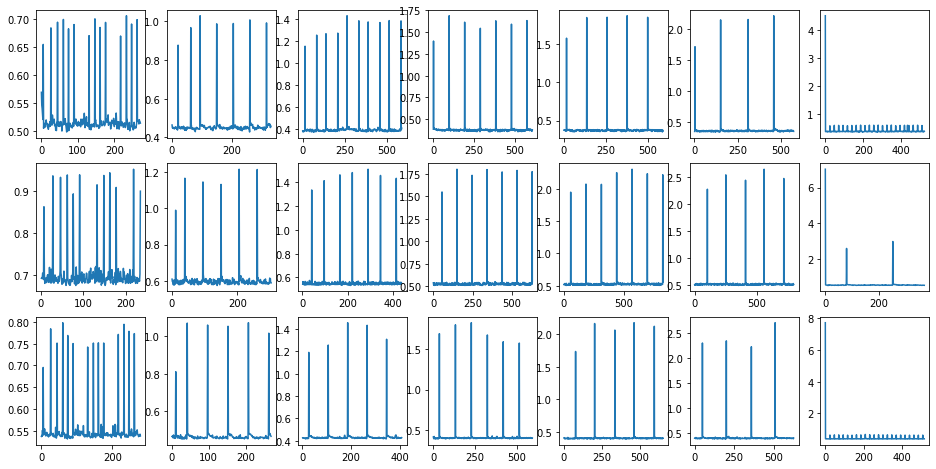

In [43]:
gpus_experiments = ['t4', 'v100', 'a100']
experiments = [1,2,3,4,5,6,7]

fig, axs = plt.subplots(len(gpus_experiments), len(experiments), figsize=(16,8))

for row, gpu in enumerate(gpus_experiments):
    for col, experiment in enumerate(experiments):
        csv_filepath = os.path.join(f'batch_size_{gpu}', f'experiment_{experiment}', 'training_epoch_data.csv')
        data_df = pd.read_csv(csv_filepath)
        axs[row, col].plot(data_df.epoch[1:], data_df.times[1:])
#         axs[row, col].set_ylim([data_df.times.mean()-0.01, 0.5])

In [5]:
frames = []

experiments = ['experiment_1_t4_1', 'experiment_1_t4_2', 'experiment_1_t4_3', 
               'experiment_2_v100_1', 'experiment_2_v100_2', 'experiment_2_v100_3',
               'experiment_3_a100_1', 'experiment_3_a100_2', 'experiment_3_a100_3',]

for experiment in experiments:
    output_filepath = os.path.join(f'multiple_reconstruction/{experiment}', 'output.json')
    config_filepath = os.path.join(f'multiple_reconstruction/{experiment}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['down_res'] = config_data['sensor_parameters']['down_res']
    df['cgpu'] = experiment.split('_')[-2]
    frames.append(df)

    
# for experiment in experiments:
#     output_filepath = os.path.join(f'reconstruction/{experiment}', 'output.json')
#     config_filepath = os.path.join(f'reconstruction/{experiment}', 'config.json')
#     df = pd.read_json(output_filepath)
#     df = df.drop(columns=['counter'])
#     df = df.T
#     config_data = json.load(open(config_filepath))
#     df['down_res'] = config_data['sensor_parameters']['down_res']
#     df['cgpu'] = experiment.split('_')[-1]
#     frames.append(df)
    
df = pd.concat(frames)
df

,cylinder_half_flipped_max_l2_error,cylinder_half_flipped_mean_l2_error,cylinder_half_flipped_min_l2_error,cylinder_half_flipped_total_prediction_samples,cylinder_half_flipped_total_prediction_time,cylinder_half_max_l2_error,cylinder_half_mean_l2_error,cylinder_half_min_l2_error,cylinder_half_total_prediction_samples,cylinder_half_total_prediction_time,...,triangle_ar_1p66_min_l2_error,triangle_ar_1p66_total_prediction_samples,triangle_ar_1p66_total_prediction_time,triangle_ar_2p0_max_l2_error,triangle_ar_2p0_mean_l2_error,triangle_ar_2p0_min_l2_error,triangle_ar_2p0_total_prediction_samples,triangle_ar_2p0_total_prediction_time,down_res,cgpu
0,0.050827,0.037728,0.026557,400.0,0.961831,0.046019,0.036437,0.029223,400.0,0.970416,...,0.114094,400.0,0.979786,0.097456,0.097400,0.097363,400.0,0.950554,8,t4
0,0.296642,0.212121,0.135597,400.0,0.913516,0.260339,0.179312,0.117350,400.0,0.915997,...,0.426962,400.0,0.961347,0.601265,0.600084,0.599388,400.0,0.925393,16,t4
0,0.606251,0.456345,0.344868,400.0,0.952039,0.614650,0.331992,0.244123,400.0,0.946862,...,0.738858,400.0,0.952623,1.147182,1.130970,1.127634,400.0,0.906993,32,t4
0,0.059709,0.044234,0.032863,400.0,0.379896,0.046095,0.037983,0.033066,400.0,0.380372,...,0.102472,400.0,0.380439,0.085693,0.085405,0.085114,400.0,0.380830,8,v100
0,0.311962,0.219945,0.134334,400.0,0.386040,0.237521,0.171013,0.099493,400.0,0.380454,...,0.438541,400.0,0.386954,0.552489,0.552028,0.551402,400.0,0.387035,16,v100
0,0.660329,0.473420,0.311597,400.0,0.385671,0.543982,0.352391,0.259007,400.0,0.386029,...,0.727582,400.0,0.385476,1.278903,1.209833,1.182986,400.0,0.380489,32,v100
0,0.056095,0.042586,0.029001,400.0,0.307443,0.044431,0.034660,0.026753,400.0,0.315632,...,0.091631,400.0,0.307976,0.093308,0.093238,0.093181,400.0,0.329215,8,a100
0,0.310720,0.228221,0.145200,400.0,0.320085,0.214085,0.166994,0.117617,400.0,0.309487,...,0.407545,400.0,0.307928,0.555897,0.555729,0.555466,400.0,0.308296,16,a100
0,0.694753,0.464694,0.351365,400.0,0.326699,0.516006,0.322372,0.248978,400.0,0.314420,...,0.736440,400.0,0.314589,1.469699,1.462976,1.411169,400.0,0.313805,32,a100


In [3]:
df_val = df[['cgpu', 'min_l2_error','max_l2_error','mean_l2_error', 'total_prediction_time', 'total_prediction_samples', 'total_training_time', 'total_epochs', 'down_res']].set_index(['cgpu'])
df_val[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val['prediction_time_per_sample'] = df_val['total_prediction_time'] / df_val['total_prediction_samples'] * 1000
df_val['time_per_epoch'] = df_val['total_training_time'] / df_val['total_epochs']
df_val = df_val.fillna('-')

df_val = df_val.rename(columns={
    'down_res': 'Downsample resolution',
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'total_prediction_time':'Total prediction time [s]',
    'total_prediction_samples':'Total prediction samples',
    'prediction_time_per_sample':'Prediction time per sample [ms]',
    'total_training_time':'Total training time [s]',
    'total_epochs':'Total epochs',
    'time_per_epoch': 'Time per epoch [s]'
})
df_val

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Total training time [s],Total epochs,Downsample resolution,Prediction time per sample [ms],Time per epoch [s]
cgpu,,,,,,,,,,
t4,1.281238,1.597735,1.425005,2.689706,320.0,4849.433381,328.0,8,8.405332,14.784858
t4,1.433338,1.883672,1.634208,2.751402,320.0,4378.258434,297.0,8,8.598132,14.741611
v100,1.159776,1.510203,1.336349,1.251311,320.0,1738.976978,345.0,8,3.910347,5.040513
a100,1.863071,2.350773,2.070542,1.163104,320.0,831.522366,205.0,8,3.634701,4.056207


In [4]:
obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]
frames_test = []
for obstacle in obstacles:
    df_test = df[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error',f'{obstacle}_total_prediction_time',f'{obstacle}_total_prediction_samples','cgpu']].set_index(['cgpu'])
    df_test[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error']] *= 100
    df_test[f'{obstacle}_prediction_time_per_sample'] = df_test[f'{obstacle}_total_prediction_time'] / df_test[f'{obstacle}_total_prediction_samples'] * 1000
    df_test = df_test.fillna('-')

    df_test = df_test.rename(columns={
        f'{obstacle}_min_l2_error':'Min L2 error [%]',
        f'{obstacle}_max_l2_error':'Max L2 error [%]',
        f'{obstacle}_mean_l2_error':'Mean L2 error [%]',
        f'{obstacle}_total_prediction_time':'Total prediction time [s]',
        f'{obstacle}_total_prediction_samples':'Total prediction samples',
        f'{obstacle}_prediction_time_per_sample':'Prediction time per sample [ms]',
    })
    frames_test.append(df_test)

df_test = pd.concat(frames_test)
df_test_max = df_test.groupby(level=[0]).max()
df_test_min = df_test.groupby(level=[0]).min()

df_test_min_max = df_test_min.applymap(lambda x : [round(x,2)]) + df_test_max.applymap(lambda x : [round(x,2)])

df_test_min_max

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Prediction time per sample [ms]
cgpu,,,,,,
a100,"[2.74, 12.6]","[3.35, 17.33]","[3.02, 14.82]","[0.31, 0.9]","[400.0, 400.0]","[0.78, 2.24]"
t4,"[2.3, 12.54]","[3.17, 18.12]","[2.81, 15.22]","[0.91, 2.22]","[400.0, 400.0]","[2.27, 5.54]"
v100,"[2.44, 11.69]","[3.04, 17.68]","[2.83, 14.58]","[0.38, 1.07]","[400.0, 400.0]","[0.96, 2.66]"


In [6]:
labels = []
mins = []
maxs = []
means = []
means_incl_firsts = []
firsts = []
totals = []

for experiment in experiments:
    csv_filepath = os.path.join('reconstruction',experiment, 'training_epoch_data.csv')
    df = pd.read_csv(csv_filepath)
    labels.append(experiment.split('_')[-1])
    mins.append(df.times[1:].min())
    maxs.append(df.times[1:].max())
    means.append(df.times[1:].mean())
    means_incl_firsts.append(df.times.mean())
    firsts.append(df.times[0])
    totals.append(len(df))
df

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width*0, mins, width, label='min')
rects2 = ax.bar(x + width*1, means, width, label='mean')
rects1 = ax.bar(x + width*2, maxs, width, label='max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time per epoch [s]')
ax.set_title('Time per epoch [s] after first epoch')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,firsts)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
ax.set_title('First epoch time [s]')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,totals)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
ax.set_title('Total epoch vs. model')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'reconstruction/experiment_1_t4_1/training_epoch_data.csv'

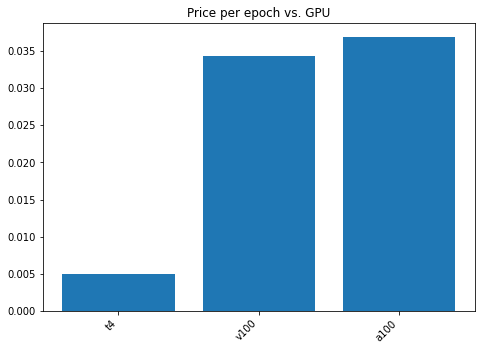

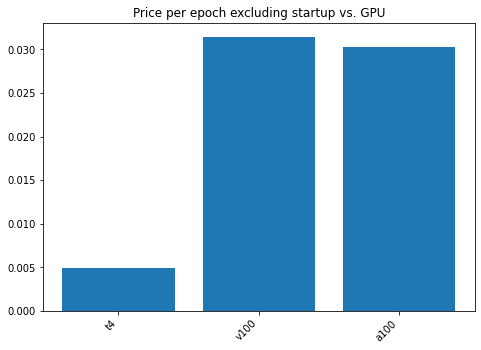

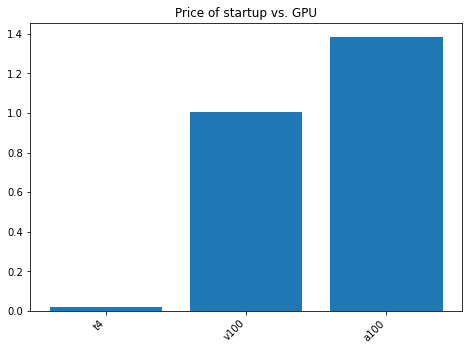

In [6]:
# t4, v100, a100 hourly prices
prices = np.array([1.204, 24.48, 32.77,]) / 3600

price_per_epoch = prices * means_incl_firsts
price_per_epoch_ex_start = prices * means 
price_startup = firsts * prices

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,price_per_epoch)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
ax.set_title('Price per epoch vs. GPU')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,price_per_epoch_ex_start)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
ax.set_title('Price per epoch excluding startup vs. GPU')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,price_startup)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
ax.set_title('Price of startup vs. GPU')
plt.show()

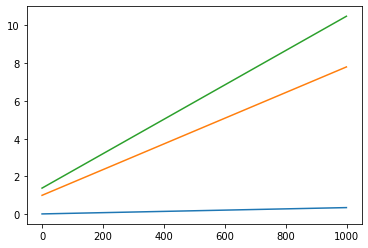

In [37]:
t = np.arange(1000)

total_cost = price_startup.reshape(3,1) + (prices.reshape(3,1) * t.reshape(1000,1).T)

plt.figure()
plt.plot(epochs, total_cost[0])
plt.plot(epochs, total_cost[1])
plt.plot(epochs, total_cost[2])
plt.show()

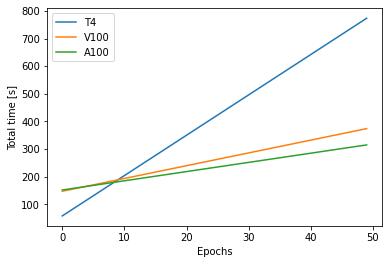

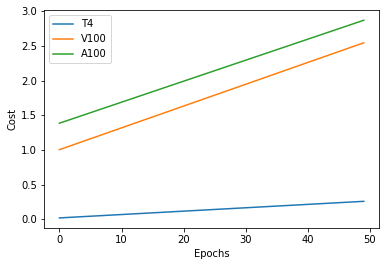

In [77]:
n=50
epochs = np.arange(n)
total_time = np.zeros((3,n))
total_time[:,0] = firsts
total_time[:,1:] = np.array(means).reshape(3,1)
total_time = (total_time.cumsum(axis=-1))
total_cost = prices.reshape(3,1) * total_time

plt.figure()
plt.plot(epochs, total_time[0], label='T4')
plt.plot(epochs, total_time[1], label='V100')
plt.plot(epochs, total_time[2], label='A100')
plt.xlabel('Epochs')
plt.ylabel('Total time [s]')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, total_cost[0], label='T4')
plt.plot(epochs, total_cost[1], label='V100')
plt.plot(epochs, total_cost[2], label='A100')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [43]:
csv_filepath = os.path.join('reconstruction','experiment_1_t4','training_epoch_data.csv')
df_t4 = pd.read_csv(csv_filepath)
csv_filepath = os.path.join('reconstruction','experiment_2_v100','training_epoch_data.csv')
df_v100 = pd.read_csv(csv_filepath)
csv_filepath = os.path.join('reconstruction','experiment_3_a100','training_epoch_data.csv')
df_a100 = pd.read_csv(csv_filepath)

0        58.365209
1        72.639845
2        86.924639
3       101.245620
4       115.613206
          ...     
292    4319.928356
293    4334.352633
294    4348.767025
295    4363.216132
296    4377.704009
Name: times, Length: 297, dtype: float64

In [71]:
frames = []

experiments = ['experiment_1_t4_2']#, 'experiment_2_v100', 'experiment_3_a100']

for experiment in experiments:
    output_filepath = os.path.join(f'multiple_reconstruction/{experiment}', 'output.json')
    config_filepath = os.path.join(f'multiple_reconstruction/{experiment}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['down_res'] = config_data['sensor_parameters']['down_res']
    df['gpu_count'] = 1
    df['cgpu'] = experiment.split('_')[-1]
    frames.append(df)
    
    
for experiment in experiments:
    output_filepath = os.path.join(f'multiple_reconstruction_2/{experiment}', 'output.json')
    config_filepath = os.path.join(f'multiple_reconstruction_2/{experiment}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['down_res'] = config_data['sensor_parameters']['down_res']
    df['gpu_count'] = 2
    df['cgpu'] = experiment.split('_')[-1]
    frames.append(df)
    
for experiment in experiments:
    output_filepath = os.path.join(f'multiple_reconstruction_4/{experiment}', 'output.json')
    config_filepath = os.path.join(f'multiple_reconstruction_4/{experiment}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['down_res'] = config_data['sensor_parameters']['down_res']
    df['gpu_count'] = 4
    df['cgpu'] = experiment.split('_')[-1]
    frames.append(df)
    
for experiment in experiments:
    output_filepath = os.path.join(f'multiple_reconstruction_8/{experiment}', 'output.json')
    config_filepath = os.path.join(f'multiple_reconstruction_8/{experiment}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['down_res'] = config_data['sensor_parameters']['down_res']
    df['gpu_count'] = 8
    df['cgpu'] = experiment.split('_')[-1]
    frames.append(df)
    
# for experiment in experiments:
#     output_filepath = os.path.join(f'reconstruction/{experiment}', 'output.json')
#     config_filepath = os.path.join(f'reconstruction/{experiment}', 'config.json')
#     df = pd.read_json(output_filepath)
#     df = df.drop(columns=['counter'])
#     df = df.T
#     config_data = json.load(open(config_filepath))
#     df['down_res'] = config_data['sensor_parameters']['down_res']
#     df['cgpu'] = experiment.split('_')[-1]
#     frames.append(df)
    
df = pd.concat(frames)
df

,cylinder_half_flipped_max_l2_error,cylinder_half_flipped_mean_l2_error,cylinder_half_flipped_min_l2_error,cylinder_half_flipped_total_prediction_samples,cylinder_half_flipped_total_prediction_time,cylinder_half_max_l2_error,cylinder_half_mean_l2_error,cylinder_half_min_l2_error,cylinder_half_total_prediction_samples,cylinder_half_total_prediction_time,...,triangle_ar_1p66_total_prediction_samples,triangle_ar_1p66_total_prediction_time,triangle_ar_2p0_max_l2_error,triangle_ar_2p0_mean_l2_error,triangle_ar_2p0_min_l2_error,triangle_ar_2p0_total_prediction_samples,triangle_ar_2p0_total_prediction_time,down_res,gpu_count,cgpu
0,0.296642,0.212121,0.135597,400.0,0.913516,0.260339,0.179312,0.117350,400.0,0.915997,...,400.0,0.961347,0.601265,0.600084,0.599388,400.0,0.925393,16,1,2
0,0.264391,0.194558,0.127614,400.0,0.754455,0.218390,0.164172,0.104871,400.0,0.766695,...,400.0,0.771215,0.537204,0.536272,0.535545,400.0,0.747015,16,2,2
0,0.345677,0.224282,0.106203,400.0,0.744248,0.206475,0.155537,0.087499,400.0,0.707808,...,400.0,0.703751,0.590219,0.589718,0.589590,400.0,0.735372,16,4,2
0,0.333064,0.207566,0.138465,400.0,0.818438,0.223578,0.169163,0.109722,400.0,0.789880,...,400.0,0.799124,0.501057,0.500725,0.500537,400.0,0.796248,16,8,2


In [72]:
df_val = df[['gpu_count', 'cgpu', 'min_l2_error','max_l2_error','mean_l2_error', 'total_prediction_time', 'total_prediction_samples', 'total_training_time', 'total_epochs', 'down_res']].set_index(['gpu_count'])
df_val[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val['prediction_time_per_sample'] = df_val['total_prediction_time'] / df_val['total_prediction_samples'] * 1000
df_val['time_per_epoch'] = df_val['total_training_time'] / df_val['total_epochs']
df_val = df_val.fillna('-')

df_val = df_val.rename(columns={
    'down_res': 'Downsample resolution',
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'total_prediction_time':'Total prediction time [s]',
    'total_prediction_samples':'Total prediction samples',
    'prediction_time_per_sample':'Prediction time per sample [ms]',
    'total_training_time':'Total training time [s]',
    'total_epochs':'Total epochs',
    'time_per_epoch': 'Time per epoch [s]'
})
df_val

,cgpu,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Total training time [s],Total epochs,Downsample resolution,Prediction time per sample [ms],Time per epoch [s]
gpu_count,,,,,,,,,,,
1,2,3.087589,5.945015,3.691028,0.937407,320.0,3980.488662,272.0,16,2.929398,14.634149
2,2,2.541848,3.733674,3.061551,2.432503,320.0,3017.652715,358.0,16,7.601573,8.429198
4,2,3.400201,6.661753,4.643489,2.194487,320.0,1626.149873,363.0,16,6.857771,4.479752
8,2,3.963531,6.209642,4.750819,2.895355,320.0,977.240917,350.0,16,9.047983,2.792117


In [73]:
obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]
frames_test = []
for obstacle in obstacles:
    df_test = df[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error',f'{obstacle}_total_prediction_time',f'{obstacle}_total_prediction_samples','gpu_count']].set_index(['gpu_count'])
    df_test[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error']] *= 100
    df_test[f'{obstacle}_prediction_time_per_sample'] = df_test[f'{obstacle}_total_prediction_time'] / df_test[f'{obstacle}_total_prediction_samples'] * 1000
    df_test = df_test.fillna('-')

    df_test = df_test.rename(columns={
        f'{obstacle}_min_l2_error':'Min L2 error [%]',
        f'{obstacle}_max_l2_error':'Max L2 error [%]',
        f'{obstacle}_mean_l2_error':'Mean L2 error [%]',
        f'{obstacle}_total_prediction_time':'Total prediction time [s]',
        f'{obstacle}_total_prediction_samples':'Total prediction samples',
        f'{obstacle}_prediction_time_per_sample':'Prediction time per sample [ms]',
    })
    frames_test.append(df_test)

df_test = pd.concat(frames_test)
df_test_max = df_test.groupby(level=[0]).max()
df_test_min = df_test.groupby(level=[0]).min()

df_test_min_max = df_test_min.applymap(lambda x : [round(x,2)]) + df_test_max.applymap(lambda x : [round(x,2)])

df_test_min_max

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Prediction time per sample [ms]
gpu_count,,,,,,
1,"[11.74, 59.94]","[26.03, 60.13]","[17.93, 60.01]","[0.91, 1.1]","[400.0, 400.0]","[2.27, 2.75]"
2,"[10.49, 53.55]","[21.84, 53.72]","[16.42, 53.63]","[0.73, 2.14]","[400.0, 400.0]","[1.82, 5.36]"
4,"[8.75, 58.96]","[20.65, 59.02]","[15.55, 58.97]","[0.65, 2.39]","[400.0, 400.0]","[1.63, 5.96]"
8,"[10.97, 50.05]","[22.36, 52.34]","[16.92, 50.07]","[0.79, 3.15]","[400.0, 400.0]","[1.97, 7.86]"


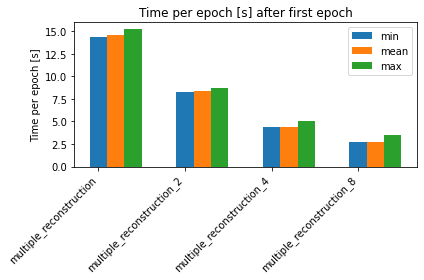

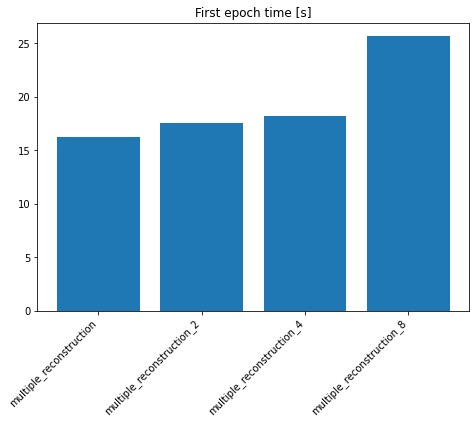

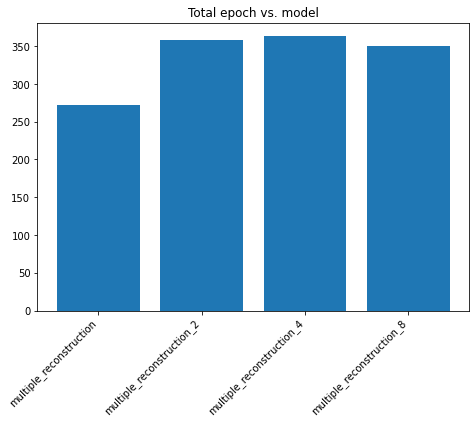

In [75]:
labels = []
mins = []
maxs = []
means = []
means_incl_firsts = []
firsts = []
totals = []

for gpu_count in ['multiple_reconstruction', 'multiple_reconstruction_2', 'multiple_reconstruction_4', 'multiple_reconstruction_8']:
    csv_filepath = os.path.join(gpu_count,'experiment_1_t4_2', 'training_epoch_data.csv')
    df = pd.read_csv(csv_filepath)
    labels.append(gpu_count)
    mins.append(df.times[1:].min())
    maxs.append(df.times[1:].max())
    means.append(df.times[1:].mean())
    means_incl_firsts.append(df.times.mean())
    firsts.append(df.times[0])
    totals.append(len(df))
df

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width*0, mins, width, label='min')
rects2 = ax.bar(x + width*1, means, width, label='mean')
rects1 = ax.bar(x + width*2, maxs, width, label='max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time per epoch [s]')
ax.set_title('Time per epoch [s] after first epoch')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,firsts)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
ax.set_title('First epoch time [s]')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,totals)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
ax.set_title('Total epoch vs. model')
plt.show()

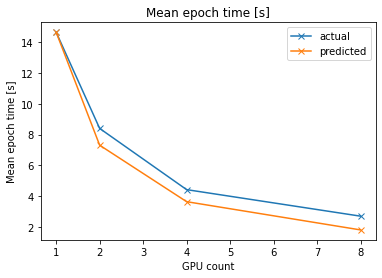

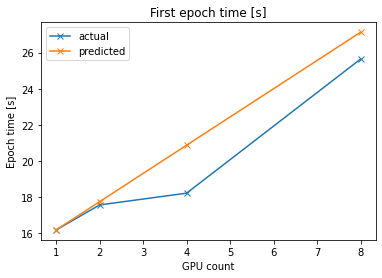

In [77]:
gpu_count = [1,2,4,8]
prediction_means = [means[0]/c for c in gpu_count]
prediction_firsts = [(firsts[0]-means[0])*c+means[0] for c in gpu_count]

plt.figure()
plt.plot(gpu_count, means, 'x-', label='actual')
plt.plot(gpu_count, prediction_means, 'x-', label='predicted')
plt.title('Mean epoch time [s]')
plt.xlabel('GPU count')
plt.ylabel('Mean epoch time [s]')
plt.legend()
plt.show()

plt.figure()
plt.plot(gpu_count, firsts, 'x-', label='actual')
plt.plot(gpu_count, prediction_firsts, 'x-', label='predicted')
plt.legend()
plt.title('First epoch time [s]')
plt.xlabel('GPU count')
plt.ylabel('Epoch time [s]')
plt.show()

In [57]:
frames = []

experiments = range(1,8)

for experiment in experiments:
    output_filepath = os.path.join(f'batch_size/experiment_{experiment}', 'output.json')
    config_filepath = os.path.join(f'batch_size/experiment_{experiment}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['down_res'] = config_data['sensor_parameters']['down_res']
    df['batch_size'] = config_data['training_parameters']['batch_size']
    df['cgpu'] = 1
    frames.append(df)

    
# for experiment in experiments:
#     output_filepath = os.path.join(f'reconstruction/{experiment}', 'output.json')
#     config_filepath = os.path.join(f'reconstruction/{experiment}', 'config.json')
#     df = pd.read_json(output_filepath)
#     df = df.drop(columns=['counter'])
#     df = df.T
#     config_data = json.load(open(config_filepath))
#     df['down_res'] = config_data['sensor_parameters']['down_res']
#     df['cgpu'] = experiment.split('_')[-1]
#     frames.append(df)
    
df = pd.concat(frames)
df

,cylinder_half_flipped_max_l2_error,cylinder_half_flipped_mean_l2_error,cylinder_half_flipped_min_l2_error,cylinder_half_flipped_total_prediction_samples,cylinder_half_flipped_total_prediction_time,cylinder_half_max_l2_error,cylinder_half_mean_l2_error,cylinder_half_min_l2_error,cylinder_half_total_prediction_samples,cylinder_half_total_prediction_time,...,triangle_ar_1p66_total_prediction_samples,triangle_ar_1p66_total_prediction_time,triangle_ar_2p0_max_l2_error,triangle_ar_2p0_mean_l2_error,triangle_ar_2p0_min_l2_error,triangle_ar_2p0_total_prediction_samples,triangle_ar_2p0_total_prediction_time,down_res,batch_size,cgpu
0,0.056332,0.049924,0.042121,400.0,0.389244,0.061658,0.046160,0.037236,400.0,0.394048,...,400.0,0.383564,0.113580,0.113450,0.113337,400.0,0.389471,8,32,1
0,0.058060,0.046272,0.033851,400.0,0.406922,0.056170,0.048093,0.036488,400.0,0.407593,...,400.0,0.394350,0.105192,0.105049,0.104919,400.0,0.388910,8,64,1
0,0.058795,0.046062,0.034618,400.0,0.385137,0.054646,0.045613,0.034903,400.0,0.399086,...,400.0,0.409415,0.117360,0.117230,0.117130,400.0,0.394859,8,128,1
0,0.060566,0.049824,0.043431,400.0,0.390139,0.063688,0.050467,0.038335,400.0,0.400516,...,400.0,0.409998,0.102672,0.102610,0.102542,400.0,0.393183,8,256,1
0,0.069156,0.055408,0.046925,400.0,0.403536,0.072273,0.061252,0.049958,400.0,0.405229,...,400.0,0.409825,0.112373,0.112315,0.112259,400.0,0.399307,8,512,1
0,0.073973,0.063049,0.056273,400.0,0.406588,0.075655,0.067328,0.054994,400.0,0.408070,...,400.0,0.415954,0.113656,0.113561,0.113438,400.0,0.411242,8,1024,1
0,0.099301,0.089050,0.082042,400.0,0.381012,0.131274,0.115448,0.098096,400.0,0.388062,...,400.0,0.398836,0.146827,0.146805,0.146752,400.0,0.394741,8,2048,1


In [58]:
df_val = df[['cgpu', 'min_l2_error','max_l2_error','mean_l2_error', 'total_prediction_time', 'total_prediction_samples', 'total_training_time', 'total_epochs', 'down_res','batch_size']].set_index(['batch_size'])
df_val[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val['prediction_time_per_sample'] = df_val['total_prediction_time'] / df_val['total_prediction_samples'] * 1000
df_val['time_per_epoch'] = df_val['total_training_time'] / df_val['total_epochs']
df_val = df_val.fillna('-')

df_val = df_val.rename(columns={
    'down_res': 'Downsample resolution',
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'total_prediction_time':'Total prediction time [s]',
    'total_prediction_samples':'Total prediction samples',
    'prediction_time_per_sample':'Prediction time per sample [ms]',
    'total_training_time':'Total training time [s]',
    'total_epochs':'Total epochs',
    'time_per_epoch': 'Time per epoch [s]'
})
df_val

,cgpu,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Total training time [s],Total epochs,Downsample resolution,Prediction time per sample [ms],Time per epoch [s]
batch_size,,,,,,,,,,,
32,1,2.299464,3.067350,2.631565,1.596044,320.0,166.094656,272.0,8,4.987636,0.610642
64,1,1.552556,2.435920,1.964072,1.578258,320.0,165.730793,330.0,8,4.932057,0.502215
128,1,1.570382,2.458483,2.060693,1.626163,320.0,253.974032,589.0,8,5.081761,0.431195
256,1,2.085612,3.442391,2.872958,1.568923,320.0,253.567943,609.0,8,4.902886,0.416368
512,1,2.860042,4.802809,3.863398,1.601884,320.0,243.147101,590.0,8,5.005889,0.412114
1024,1,3.643414,6.554821,4.957519,1.575723,320.0,233.528754,574.0,8,4.924136,0.406845
2048,1,7.061961,16.182825,10.270695,1.770310,320.0,223.923270,521.0,8,5.532218,0.429795


In [60]:
obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]
frames_test = []
for obstacle in obstacles:
    df_test = df[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error',f'{obstacle}_total_prediction_time',f'{obstacle}_total_prediction_samples','cgpu','batch_size']].set_index(['batch_size'])
    df_test[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error']] *= 100
    df_test[f'{obstacle}_prediction_time_per_sample'] = df_test[f'{obstacle}_total_prediction_time'] / df_test[f'{obstacle}_total_prediction_samples'] * 1000
    df_test = df_test.fillna('-')

    df_test = df_test.rename(columns={
        f'{obstacle}_min_l2_error':'Min L2 error [%]',
        f'{obstacle}_max_l2_error':'Max L2 error [%]',
        f'{obstacle}_mean_l2_error':'Mean L2 error [%]',
        f'{obstacle}_total_prediction_time':'Total prediction time [s]',
        f'{obstacle}_total_prediction_samples':'Total prediction samples',
        f'{obstacle}_prediction_time_per_sample':'Prediction time per sample [ms]',
    })
    frames_test.append(df_test)

df_test = pd.concat(frames_test)
df_test_max = df_test.groupby(level=[0]).max()
df_test_min = df_test.groupby(level=[0]).min()

df_test_min_max = df_test_min.applymap(lambda x : [round(x,2)]) + df_test_max.applymap(lambda x : [round(x,2)])

df_test_min_max

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,cgpu,Prediction time per sample [ms]
batch_size,,,,,,,
32,"[3.72, 15.49]","[5.49, 18.22]","[4.62, 16.85]","[0.38, 1.96]","[400.0, 400.0]","[1, 1]","[0.95, 4.89]"
64,"[3.39, 14.24]","[4.51, 16.75]","[4.24, 15.53]","[0.39, 1.8]","[400.0, 400.0]","[1, 1]","[0.97, 4.51]"
128,"[3.29, 14.57]","[4.36, 18.21]","[4.02, 16.47]","[0.38, 1.83]","[400.0, 400.0]","[1, 1]","[0.95, 4.56]"
256,"[3.83, 16.2]","[5.21, 19.34]","[4.62, 18.0]","[0.39, 1.8]","[400.0, 400.0]","[1, 1]","[0.98, 4.51]"
512,"[4.14, 14.79]","[5.0, 18.61]","[4.71, 16.76]","[0.39, 1.76]","[400.0, 400.0]","[1, 1]","[0.97, 4.39]"
1024,"[4.71, 15.04]","[5.85, 18.86]","[5.46, 17.21]","[0.38, 2.04]","[400.0, 400.0]","[1, 1]","[0.96, 5.1]"
2048,"[7.47, 15.83]","[8.54, 19.38]","[8.18, 17.56]","[0.38, 1.95]","[400.0, 400.0]","[1, 1]","[0.95, 4.86]"


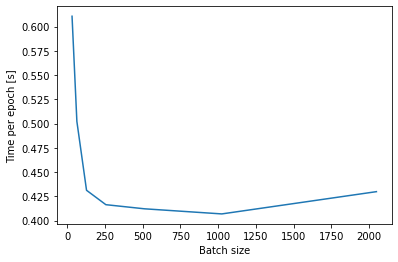

In [67]:
plt.figure()
plt.plot(df.batch_size,df.total_training_time / df.total_epochs)
plt.xlabel('Batch size')
plt.ylabel('Time per epoch [s]')
plt.show()